In [51]:
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
import cv2

In [227]:
# name of the input file
imname = './data/cathedral.jpg'

# read in the image
im = cv2.imread(imname, cv2.IMREAD_GRAYSCALE)
im = np.uint8(im)
#Invert image
im = 255 - im
norm_im = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX)

In [228]:
im.shape

(1024, 390)

In [229]:
# convert to double (might want to do this later on to save memory)    
# im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = norm_im[:height]
g = norm_im[height: 2*height]
r = norm_im[2*height: 3*height]

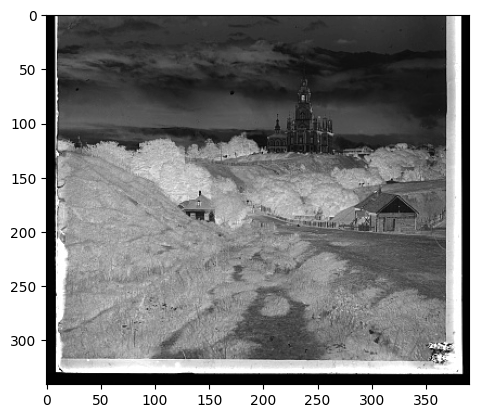

In [230]:
plt.imshow(r, cmap='gray')

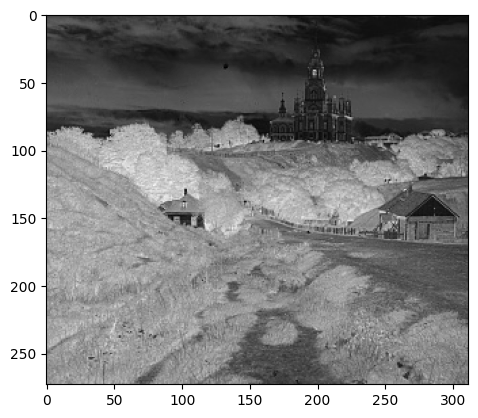

In [231]:
v_border = int(r.shape[0]*0.1)
h_border = int(r.shape[1]*0.1)
r_cropped = r[v_border:-v_border, h_border:-h_border]
plt.imshow(r_cropped, cmap='gray')

1.0


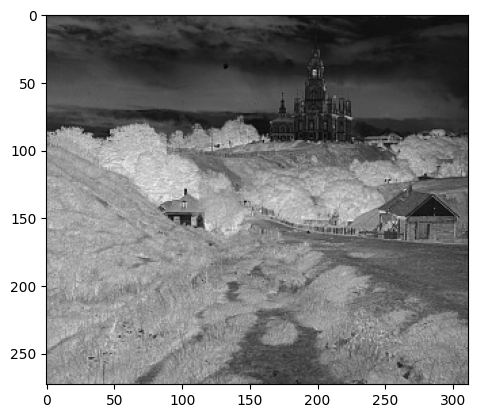

In [254]:
r_cropped_mean = r_cropped.mean()
r_cropped_std = r_cropped.std()
mean_r = np.subtract(r_cropped, r_cropped_mean)
std_r = np.divide(mean_r, r_cropped_std)
print(std_r.std())
norm_r = cv2.normalize(std_r, None, 0, 200, cv2.NORM_MINMAX)
plt.imshow(norm_r, cmap='gray', vmin=0, vmax=200)

In [249]:
np.max(norm_r)

np.float64(200.00000000000003)

In [234]:
edges_r = cv2.Canny(image=norm_r, threshold1=170, threshold2=250)
# edges_g = cv2.Canny(image=g, threshold1=170, threshold2=250)
# edges_b = cv2.Canny(image=b, threshold1=170, threshold2=250)

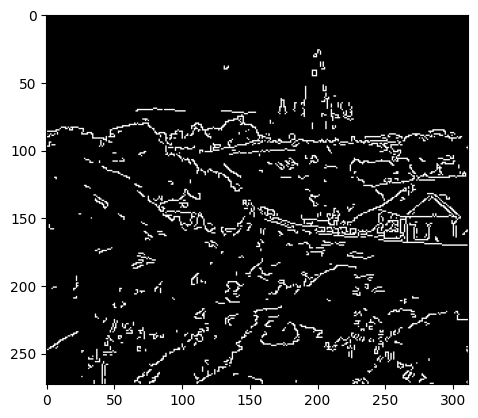

In [235]:
plt.imshow(edges_r, cmap='gray')

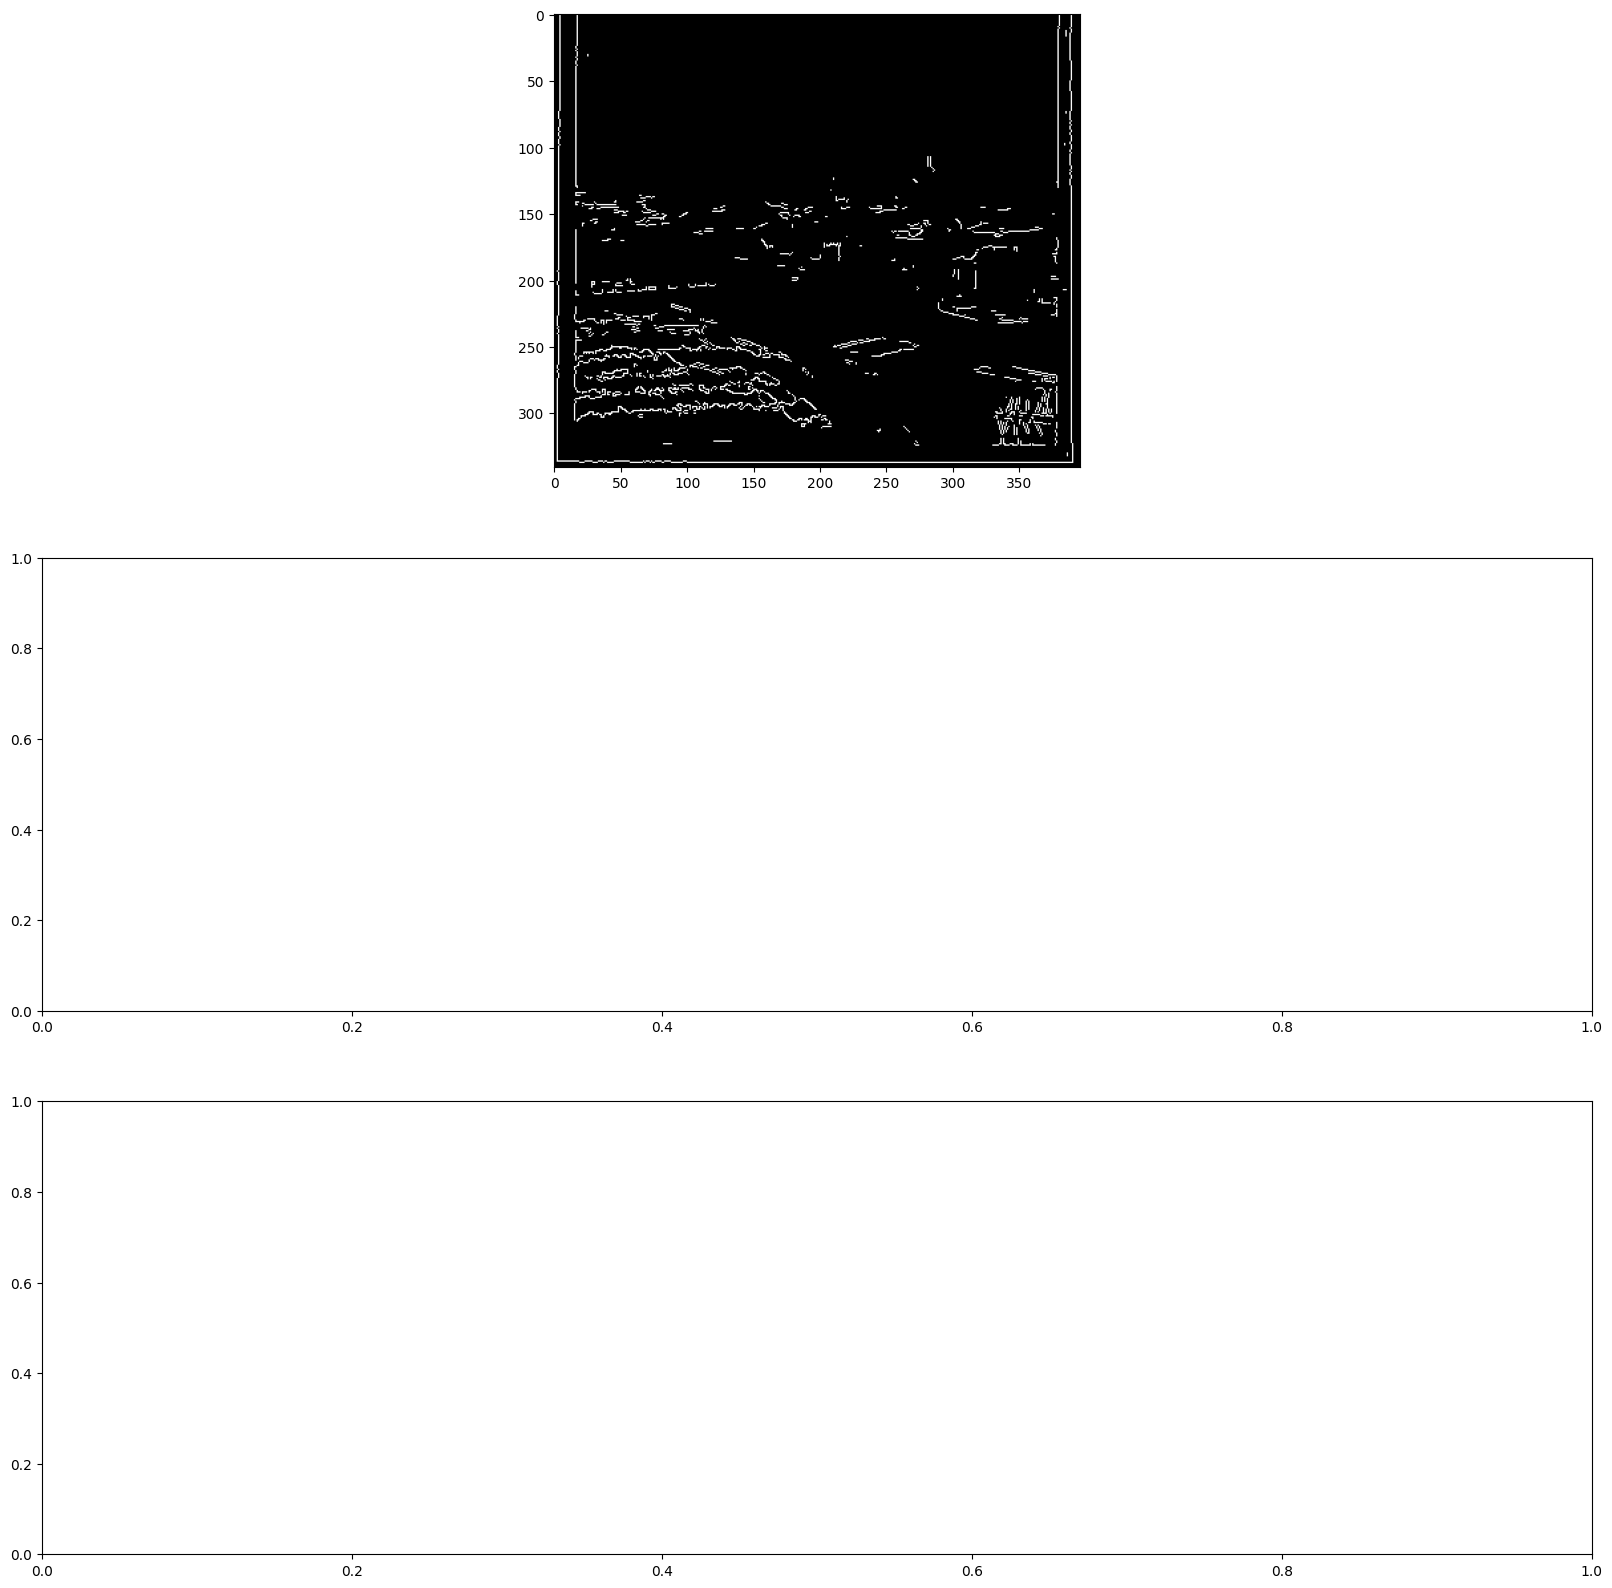

In [194]:
# fig, axs = plt.subplots(3, 1, figsize=(20, 20))
# axs[0].imshow(edges_r, cmap='gray')
# axs[1].imshow(edges_g, cmap='gray')
# axs[2].imshow(edges_b, cmap='gray')

In [46]:
colored = np.stack((r, b, g), axis=2)

In [47]:
colored.shape

(341, 390, 3)

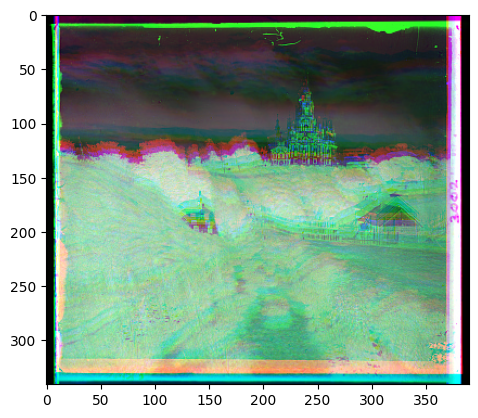

In [48]:
plt.imshow(colored)